In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
import numpy as np
plt.rcParams.update({'font.size': 14})
# https://github.com/matplotlib/ipympl#installation for matplotlib images to appear in notebook
# %matplotlib widget

In [7]:
cool_colors = {'green': (0.0, 0.716, 0.554), 'red': (1.0, 0.403, 0.397), 'blue': (0.0, 0.747, 1.0), "yellow": (0.830929, 0.793470, 0.225663), "purple": (0.745987, 0.663119, 1.000000)}

In [8]:
x_op = [0.15, 0.2, 0.23]

In [9]:
n_pts = 25

theta = np.linspace(0, 2 * np.pi, n_pts)
phi   = np.linspace(0, np.pi, n_pts)
r = 0.075

X = r * np.outer(np.cos(theta), np.sin(phi)) + x_op[0]
Y = r * np.outer(np.sin(theta), np.sin(phi)) + x_op[1]
Z = r * np.outer(np.ones(np.size(theta)), np.cos(phi)) + x_op[2]

In [10]:
# https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, muh_label, label_stretch, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
    dd = np.array([x+dx, y+dy, z+dz])
    dd = dd / np.linalg.norm(dd)

    ax.text(x+dx+label_stretch*dd[0], y+dy+label_stretch*dd[1], z+dz+label_stretch*dd[2], muh_label, ha="center", va="center")


setattr(Axes3D, 'arrow3D', _arrow3D)

In [11]:
J = np.array([[1, 2, 5], [3, 4, 6]])
J

array([[1, 2, 5],
       [3, 4, 6]])

In [12]:
np.linalg.svd(J)[0] # u

array([[-0.56849697, -0.82268536],
       [-0.82268536,  0.56849697]])

In [13]:
sigmas = np.linalg.svd(J)[1] # singular values

In [14]:
sigmas = sigmas

In [15]:
u1, u2 = np.transpose(np.linalg.svd(J)[0])
u1

array([-0.56849697, -0.82268536])

In [16]:
np.dot(u1, u2)

4.397675286158672e-16

In [17]:
np.linalg.svd(J)[2] # vt

array([[-0.32127519, -0.46846588, -0.82299573],
       [ 0.68355838,  0.48673972, -0.54390476],
       [-0.65538554,  0.73730873, -0.16384638]])

In [18]:
v1, v2, v3 = np.linalg.svd(J)[2]
v1

array([-0.32127519, -0.46846588, -0.82299573])

In [19]:
np.dot(J, v1)

array([-5.3731856 , -7.77566347])

In [20]:
u1 * sigmas[0]

array([-5.3731856 , -7.77566347])

In [21]:
theta = np.linspace(0, 2*np.pi, 250)

In [22]:
x = np.array([sigmas[0] * u1[0] * np.sin(t) + sigmas[1] * u2[0] * np.cos(t) for t in theta])
y = np.array([sigmas[0] * u1[1] * np.sin(t) + sigmas[1] * u2[1] * np.cos(t) for t in theta])
x

array([-1.06248599, -1.19771858, -1.33218858, -1.46581037, -1.59849887,
       -1.73016959, -1.86073872, -1.9901231 , -2.11824035, -2.24500892,
       -2.37034808, -2.49417803, -2.61641992, -2.73699592, -2.85582927,
       -2.9728443 , -3.0879665 , -3.20112258, -3.3122405 , -3.42124949,
       -3.52808016, -3.63266448, -3.73493587, -3.83482921, -3.93228089,
       -4.02722887, -4.1196127 , -4.20937355, -4.29645428, -4.38079943,
       -4.46235531, -4.54106998, -4.61689333, -4.68977709, -4.75967484,
       -4.82654209, -4.89033626, -4.95101672, -5.00854485, -5.06288402,
       -5.11399962, -5.16185912, -5.20643204, -5.24769   , -5.28560673,
       -5.32015809, -5.35132208, -5.37907886, -5.40341076, -5.42430228,
       -5.44174012, -5.45571318, -5.46621256, -5.47323158, -5.47676577,
       -5.47681287, -5.47337286, -5.46644794, -5.45604249, -5.44216317,
       -5.42481879, -5.4040204 , -5.37978125, -5.35211677, -5.32104457,
       -5.28658443, -5.24875831, -5.20759027, -5.16310654, -5.11

In [32]:
def sketch_vector(x0, x, label=None, dx_mag=0.1, color="k"):
    plt.arrow(x0[0], x0[1], x[0], x[1], color=color, head_width=0.35, length_includes_head=True, lw=2)
    dx = dx_mag * x / np.linalg.norm(x)
    plt.text(x0[0] + x[0] + dx[0], x0[1] + x[1] + dx[1], label, ha="center", va="center")

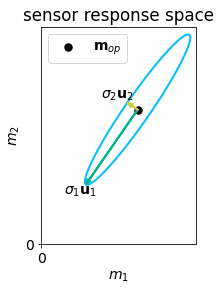

In [35]:
m_op = np.array([10, 14])
fig, ax = plt.subplots()
plt.scatter(m_op[0], m_op[1], label="$\mathbf{m}_{op}$", color="k", s=55)
plt.plot(x+m_op[0], y+m_op[1], color=cool_colors["blue"], zorder=0, lw=2)
ax.set(xlabel="$m_1$", ylabel="$m_2$", title="sensor response space", xticks=[0], yticks=[0])
sketch_vector(m_op, sigmas[0] * u1, label="$\sigma_1\mathbf{u}_1$", dx_mag=0.95, color=cool_colors["green"])
sketch_vector(m_op, sigmas[1] * u2, label="$\sigma_2\mathbf{u}_2$", dx_mag=1.25, color=cool_colors["yellow"])

# plt.arrow(m_op[0], m_op[1], sigmas[0] * u1[0], sigmas[0] * u1[1], head_width=0.5, length_includes_head=True, color="k")
# plt.arrow(m_op[0], m_op[1], sigmas[1] * u2[0], sigmas[1] * u2[1], head_width=0.5, length_includes_head=True, color="k")
# plt.text(x0[0] + x[0] + dx_label, x0[1] + x[1] + dx_label, label, ha="center", va="center")
ax.set_aspect('equal', 'box')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.savefig("toy_response_space.pdf", format="pdf", bbox_inches='tight')
plt.legend()

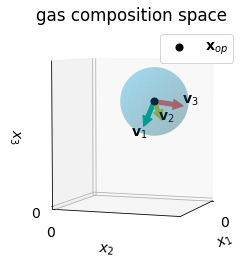

In [26]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, alpha=0.2, rstride=1, cstride=1, color=cool_colors["blue"])
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$x_3$", 
       xticks=[0], yticks=[0], zticks=[0],
       title="gas composition space")

ax.scatter(x_op[0], x_op[1], x_op[2], color="k", s=50, label="$\mathbf{x}_{op}$")
v_labels = ["$\mathbf{v}_1$", "$\mathbf{v}_2$", "$\mathbf{v}_3$"]
v_label_stretches = [-0.02, 0.02, 0.02]
for (i, v) in enumerate([v1, v2, v3]):
    color = "k"
    if i == 0:
        color = cool_colors["green"]
    if i == 1:
        color = cool_colors["yellow"]
    if i == 2:
        color = cool_colors["red"]
    ax.arrow3D(x_op[0], x_op[1], x_op[2],
               r*v[0], r*v[1], r*v[2],
               v_labels[i],
               v_label_stretches[i],
               mutation_scale=20,
               ec=color,
               fc=color)
# https://github.com/matplotlib/matplotlib/issues/17172

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_zlim(zmin=0)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])

ax.legend()
ax.view_init(elev=5., azim=20)
plt.savefig("toy_composition_space.pdf", format="pdf", bbox_inches='tight')
plt.show()